# TP1 - Laboratorio de Datos  
## Verano 2026
## EcoBicis - Ciudad Universitaria  

**Universidad de Buenos Aires**  
**Facultad de Ciencias Exactas y Naturales (FCEyN)**  
<br>


**Integrantes:** Lautaro Herrera - Nicolas Corral - David Palacio Velásquez
<br>
**Fecha:** 23 de febrero de 2026  

<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Herramientas de modelos lineales
from sklearn import linear_model

# Medidas de desempeño
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Procesamiento de datos

En esta primera sección, vamos a implementar algunas acciones básicas de selección y procesamiento
de nuestros datos. La idea sería quedarnos con un objeto llamado datos_limpios


In [4]:
# Cargamos el dataset "full_data.csv":

datos = pd.read_csv ("full_data.csv")


##Ejercicio 1

Del dataFrfame "datos" nos quedamos solo con las columnas:

- station id,
- num bikes available,
- num bikes disabled,
- num docks available,
- num docks disabled,
- Date,
- hora,
- dia.

In [5]:
# Para que sea mas prolijo, creamos primero una lista de las columnas que queremos obtener del df "datos":
columnas_seleccionadas = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_seleccionadas].copy()

# Verificamos si se guardó correctamente el nuevo dataframe. Para ello usamos el método head para darle un vistazo a las primeras filas:

datos_limpios.head()

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday


##Ejercicio 2

Pasamos todos los nombres de columna a español utilizando un diccionario. Los nuevos nombres
son:

- "estacion" para "station_id"
- "bicis disponibles" para "num_bikes_available"
- "bicis rotas" para "num_bikes_disabled"
- "puertos disponibles" para "num_docks_available"
- "puertos rotos" para "num_docks_disabled"
- "fecha" para "Date"
- "horario" para "hora"
- "dia semana" para "dia"


Para esto primero definimos un diccionario donde las claves son los nombres de las columnas a modificar y el valor los nuevos nombres.
Luego usamos el método rename de pandas para modificar las columnas antes nombradas.

In [7]:
# Definimos un diccionario para traducir los nombres:

diccionario_Traducción = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

# Aplicamos la traducción:

datos_limpios = datos_limpios.rename(columns=diccionario_Traducción)

In [8]:
# Damos un vistazo de como quedó el archivo con este cambio:

datos_limpios.columns

# Los cambios se aplicaron con exito

Index(['estacion', 'bicis_disponibles', 'bicis_rotas', 'puertos_disponibles',
       'puertos_rotos', 'fecha', 'horario', 'dia_semana'],
      dtype='object')

##Ejercicio 3

Pasar los días de la variable dia a español (pueden usar map con un diccionario o alguna función
específica para fechas).

Ahora vamos a traducir los dias de la columna "dia_semana" al español utilizando un diccionario, con la misma idea de antes, simplemente que por un tema de eficiencia vamos a utilizar la función "map" y no "replace"

In [9]:
# Definimos un diccionario para traducir los días:

diccionario_Dias = {
    "Monday" : "Lunes",
    "Tuesday" : "Martes",
    "Wednesday" : "Miercoles",
    "Thursday" : "Jueves",
    "Friday" : "Viernes",
    "Saturday" : "Sabado",
    "Sunday" : "Domingo"
}
# Aplicamos la traducción:

datos_limpios["dia_semana"] = datos_limpios["dia_semana"].map(diccionario_Dias)

datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes
2,420,5,1,6,1,2025-04-29,00:32:59,Martes
3,464,11,2,7,0,2025-04-29,00:32:59,Martes
4,420,5,1,6,1,2025-04-29,01:13:46,Martes


##Ejercicio 4

¿Cuáles son los distintos tipos de variables que tenemos ahora?

Verificamos que tipo de datos contiene nuestro DataFrame. Se presentan dos formas de hacerlo:  La primera revisando por columna y la segunda, más compacta, nos muestra una lista donde cada elemento es un tipo de dato dentro del df.

In [11]:
print(datos_limpios.dtypes)

# Una lista con los tipos de datos. Tengo Enteros (Int64) y Objects (O):

list(datos_limpios.dtypes.unique())

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
dtype: object


[dtype('int64'), dtype('O')]

Se tienen datos numéricos y categóricos:

1. Numéricos

    - bicis_disponibles (Tipo int64)

    - bicis_rotas (Tipo int64)

    - puertos_disponibles (Tipo int64)

    - puertos_rotos (Tipo int64)


2. Categóricas:

    - estacion (Tipo int64)


Respecto a los datos temporales, se tiene: fecha, horario y dia_semana, de tipo object.

##Ejercicio 5

¿La base de datos contiene datos faltantes? ¿Cuántos?

Veremos a continuacion si el df contiene datos faltantes, usando los métodos encadenados isna().sum(). El primer método mira si en una posicion falta el dato o no y se crea una mascara sobre las posiciones con True si falta el dato o False en caso  contrario. Luego sum suma los valores booleanos, donde a True los interpreta como 1 y 0 a False.

In [13]:
# Se revisa si hay datos faltantes:

total_faltantes = datos_limpios.isna().sum().sum()

print("La cantidad de datos faltantes del df 'datos_limpios' es ",total_faltantes)


La cantidad de datos faltantes del df 'datos_limpios' es  0


No existen valores faltantes en el dataset.

##Ejercicio 6

Los datos de fechas y hora son bastante complejos de manejar. Una forma bastante simple
de hacerlo ser´ıa generar las variables ”anio”, ”mes”, ”dia” y ”hora” extrayendo la informaci´on
consecuente de los strings de ”fecha” y ”horario”. Verific´a que las variables resultantes sean
num´ericas (o convertilas a num´ericas si fuera necesario).

In [14]:
datos_limpios["fecha"].str.len().value_counts()

,count
fecha,
10,12528


In [15]:
(
    (datos_limpios["fecha"].str[4] == "-") &
    (datos_limpios["fecha"].str[7] == "-")
).value_counts()

,count
fecha,
True,12528


In [25]:
# Antes de continuar, verificamos que las fechas estén en formato Año-Mes-Día ("YYY-MM-DD"):

print("Longitud de la variable 'fecha':")
print(datos_limpios["fecha"].str.len().value_counts())
print("\nInterpretación: Todas las fechas deberían tener longitud 10 (formato YYYY-MM-DD)\n")




Longitud de la variable 'fecha':
fecha
10    12528
Name: count, dtype: int64

Interpretación: Todas las fechas deberían tener longitud 10 (formato YYYY-MM-DD)



Se verificó que la variable fecha tiene longitud 10 en la totalidad de las 12.528 observaciones. Continuamos con la resolución del ejercicio 6:

In [26]:
# Para extraer año, mes y día desde fecha, con el formato "YYYY-MM-DD", teniendo en cuenta que los datos en las posiciones 4 y 7 corresponde a guiones:

datos_limpios["anio"] = datos_limpios["fecha"].str[0:4] # Los valores en las posiciones 0 a 3 corresponden al año.

datos_limpios["mes"] = datos_limpios["fecha"].str[5:7] # Los valores en las posiciones 5 y 6  corresponden al año.

datos_limpios["dia"] = datos_limpios["fecha"].str[8:10] # Los valores en las posiciones 8 y 9 corresponden al año.

6. (Hecho con el método de 7)

Los datos de fechas y hora son bastante complejos de manejar. Una forma bastante simple que utilizamos
para manejar estos tipos es generar las variables "anio", "mes", "dia" y "hora" extrayendo la información
consecuente de los strings de "fecha" y "horario". Luego verificamos que las variables resultantes son
numéricas.


In [ ]:
# Convertimos los datos a formato datetime:

datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])



/tmp/ipython-input-1400464593.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])


In [ ]:
# Extraemos variables numéricas

datos_limpios["anio"] = datos_limpios["fecha"].dt.year
datos_limpios["mes"] = datos_limpios["fecha"].dt.month
datos_limpios["dia"] = datos_limpios["fecha"].dt.day
datos_limpios["hora"] = datos_limpios["horario"].dt.hour

In [ ]:
# Verificamos tipos de datos:
datos_limpios[["anio", "mes", "dia", "hora"]].dtypes

,0
anio,int32
mes,int32
dia,int32
hora,int32


In [ ]:
# La fecha en formato datetime:

datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])

# Horario a tipo hora (time):

datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"]).dt.time

# Verificamos los tipos de datos:

datos_limpios[["fecha", "horario"]].dtypes

,0
fecha,datetime64[ns]
horario,object


8. Implementamos la función llamada "determinar_estacion_anio" que permite construir una variable llamada "estacion_anio" al pasarle nuestros datos. La variable está construida a partir de las variables "dia" y "mes".




In [ ]:

# Usamos estas fechas:  Verano 21 dic a 20 mar ; Otoño 21 mar a 20 jun ; Invierno 21 jun a 20 sep ; Primavera 21 sep a 20 dic.

# A partir de día y mes:

def determinar_estacion_anio(df):

    mes = df["mes"]
    dia = df["dia"]

    condiciones = [
        # Verano: 21 dic – 20 mar
        ((mes == 12) & (dia >= 21)) |
        (mes.isin([1, 2])) |
        ((mes == 3) & (dia <= 20)),

        # Otoño: 21 mar – 20 jun
        ((mes == 3) & (dia >= 21)) |
        (mes.isin([4, 5])) |
        ((mes == 6) & (dia <= 20)),

        # Invierno: 21 jun – 20 sep
        ((mes == 6) & (dia >= 21)) |
        (mes.isin([7, 8])) |
        ((mes == 9) & (dia <= 20)),

        # Primavera: 21 sep – 20 dic
        ((mes == 9) & (dia >= 21)) |
        (mes.isin([10, 11])) |
        ((mes == 12) & (dia <= 20))
    ]

    estaciones = ["Verano", "Otoño", "Invierno", "Primavera"]


    df["estacion_anio"] = np.select(condiciones, estaciones, default="Sin estacion")


    return df

In [ ]:
# Aplicamos la función:

datos_limpios = determinar_estacion_anio(datos_limpios)

# Verificamos:

print(datos_limpios["estacion_anio"].unique()) #para mirar las categorías que contiene esta columna

print(datos_limpios["estacion_anio"].value_counts())

# Se implementó la función `determinar_estacion_anio` para clasificar cada observación según la estación del año.
#La clasificación se realizó utilizando las variables `mes` y `dia`, considerando las fechas de cambio de estación en Argentina.

['Otoño' 'Invierno' 'Primavera' 'Verano']
estacion_anio
Primavera    4078
Invierno     4036
Otoño        2380
Verano       2034
Name: count, dtype: int64


# Análisis descriptivo

In [ ]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


9. A continuacion generamos un nuevo dataFrame llamado "datos_agrupados" que contiene la cantidad de bicis disponibles, la cantidad de bicis rotas
    ,la cantidad de puertos disponibles en toda Ciudad universitaria, es decir sumando estas cantidades de ambas estaciones,
   además conservando las columnas "fecha", "hora", "dia_semana", "dia", "mes" y "anio".

Para analizar la disponibilidad total en Ciudad Universitaria, se construyó un nuevo dataframe agrupado por fecha y hora, sumando la información de ambas estaciones.

Se agregaron las siguientes variables:

- cantidad_bicis_disponibles

- cantidad_bicis_rotas

- cantidad_puertos_disponibles

Y se conservaron:

- fecha

- hora

- dia_semana

- dia

- mes

- anio

In [ ]:
datos_agrupados = (
    datos_limpios
    .groupby(["fecha", "hora", "dia_semana", "dia", "mes", "anio"], as_index=False)
    [["bicis_disponibles","bicis_rotas","puertos_disponibles"]] #con esto declaramos a que columna le queremos aplicar la funcion 'sum'
    .agg("sum")
)


In [ ]:
# Renombramos para que quede más claro
nuevos_nombres={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
}
datos_agrupados = datos_agrupados.rename(columns=nuevos_nombres)

# Verificamos:

datos_agrupados.head()


,fecha,hora,dia_semana,dia,mes,anio,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles
0,2025-04-28,23,Lunes,28,4,2025,14,3,15
1,2025-04-29,0,Martes,29,4,2025,16,3,13
2,2025-04-29,1,Martes,29,4,2025,16,3,13
3,2025-04-29,2,Martes,29,4,2025,16,3,13
4,2025-04-29,3,Martes,29,4,2025,16,3,13


10. A continuación vamos a crear un nuevo dataframe llamado "datos_por_temporada", en este podremos ver la cantidad total de bicis
    y puertos disponibles, tambien la cantidad de bicis rotas por temporada del año.

In [ ]:
datos_por_temporada=(
    determinar_estacion_anio(datos_agrupados)
    .groupby("estacion_anio",as_index=False)
    .agg({"cantidad_bicis_disponibles":"sum","cantidad_puertos_disponibles":"sum","cantidad_bicis_rotas":"sum"})
)

In [ ]:
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas
0,Invierno,23765,36356,4435
1,Otoño,14411,20701,2745
2,Primavera,9961,49238,6049
3,Verano,8792,21147,2605


 Ahora le agregamos una nueva columna al df que nos da cuenta de la capacidad total de bicis por temporada, sin contar la
 cantidad de bicis rotas

In [ ]:
datos_por_temporada["capacidad_total_bicis_utilizables"]=datos_por_temporada["cantidad_bicis_disponibles"]+datos_por_temporada["cantidad_puertos_disponibles"]
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas,capacidad_total_bicis_utilizables
0,Invierno,23765,36356,4435,60121
1,Otoño,14411,20701,2745,35112
2,Primavera,9961,49238,6049,59199
3,Verano,8792,21147,2605,29939


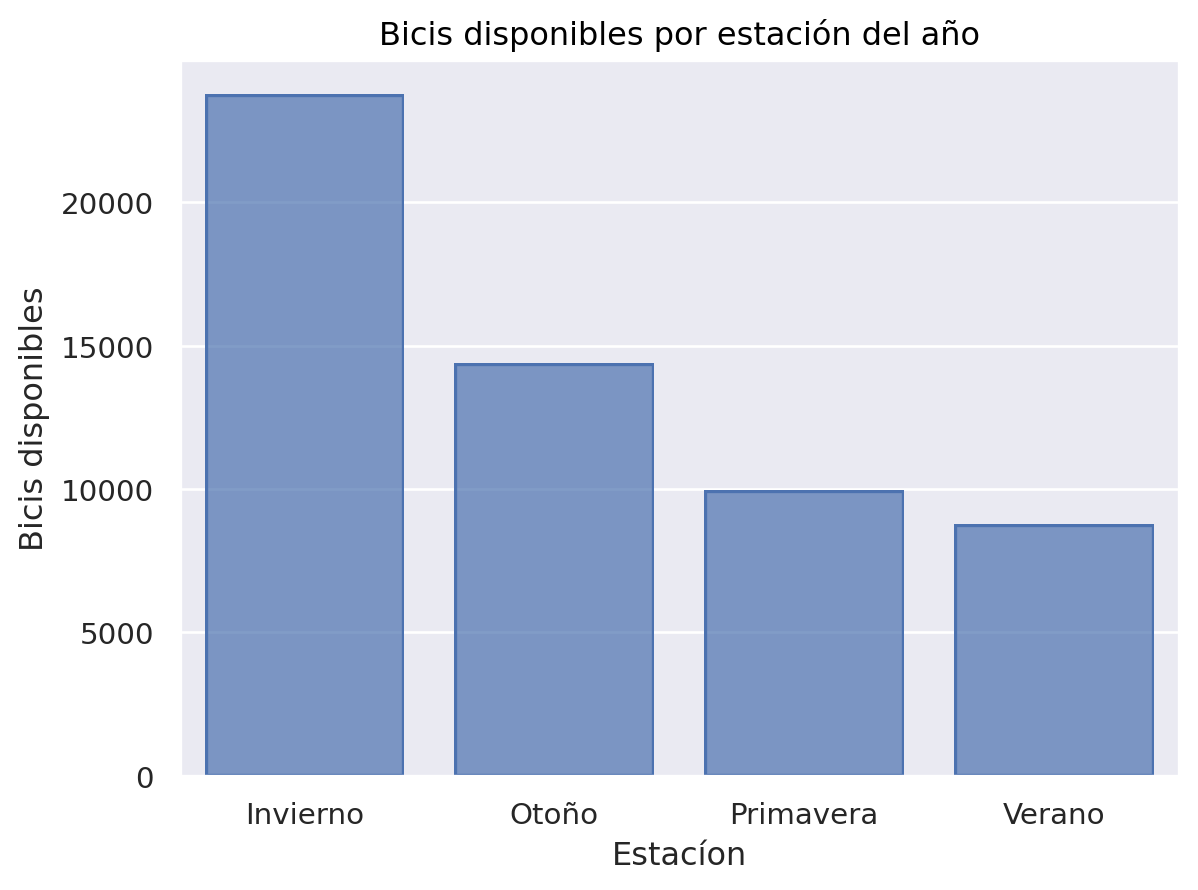

In [ ]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Bicis disponibles")
)

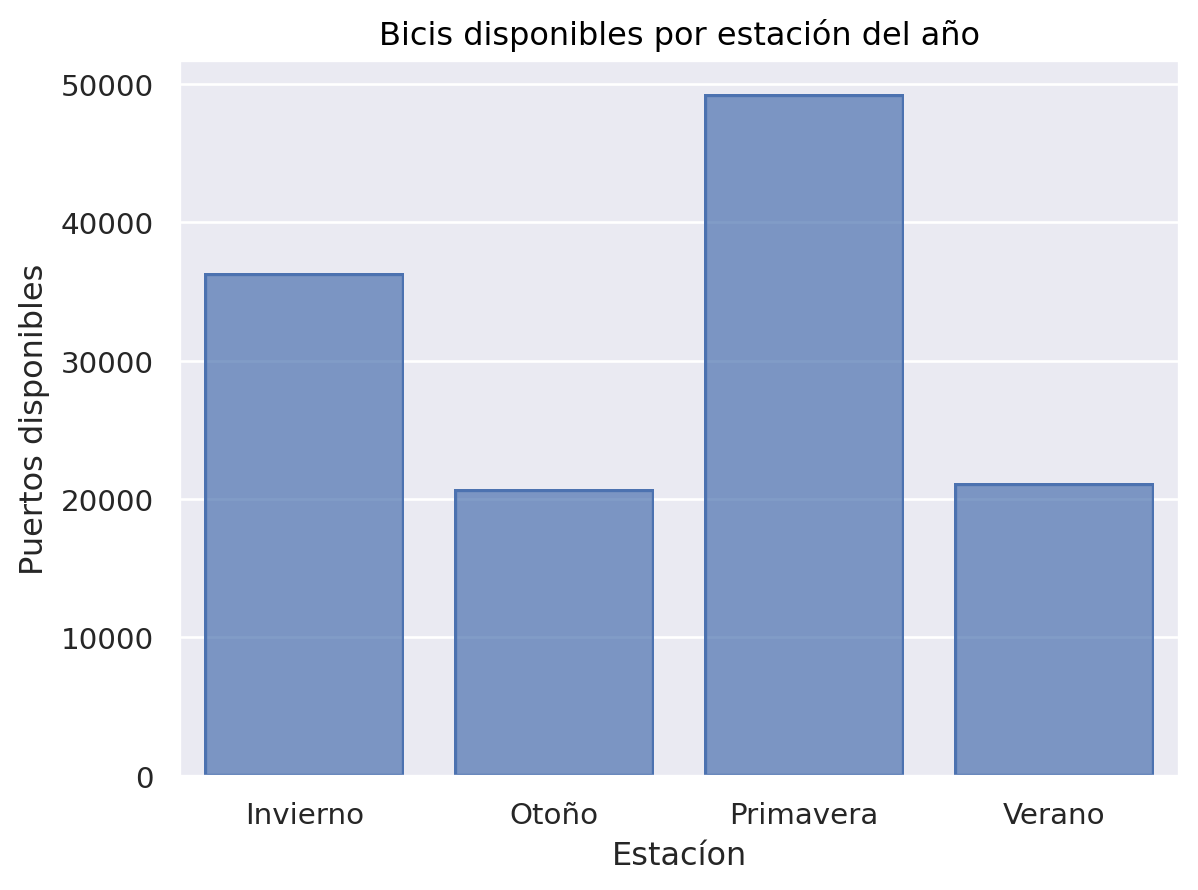

In [ ]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_puertos_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Puertos disponibles")
)

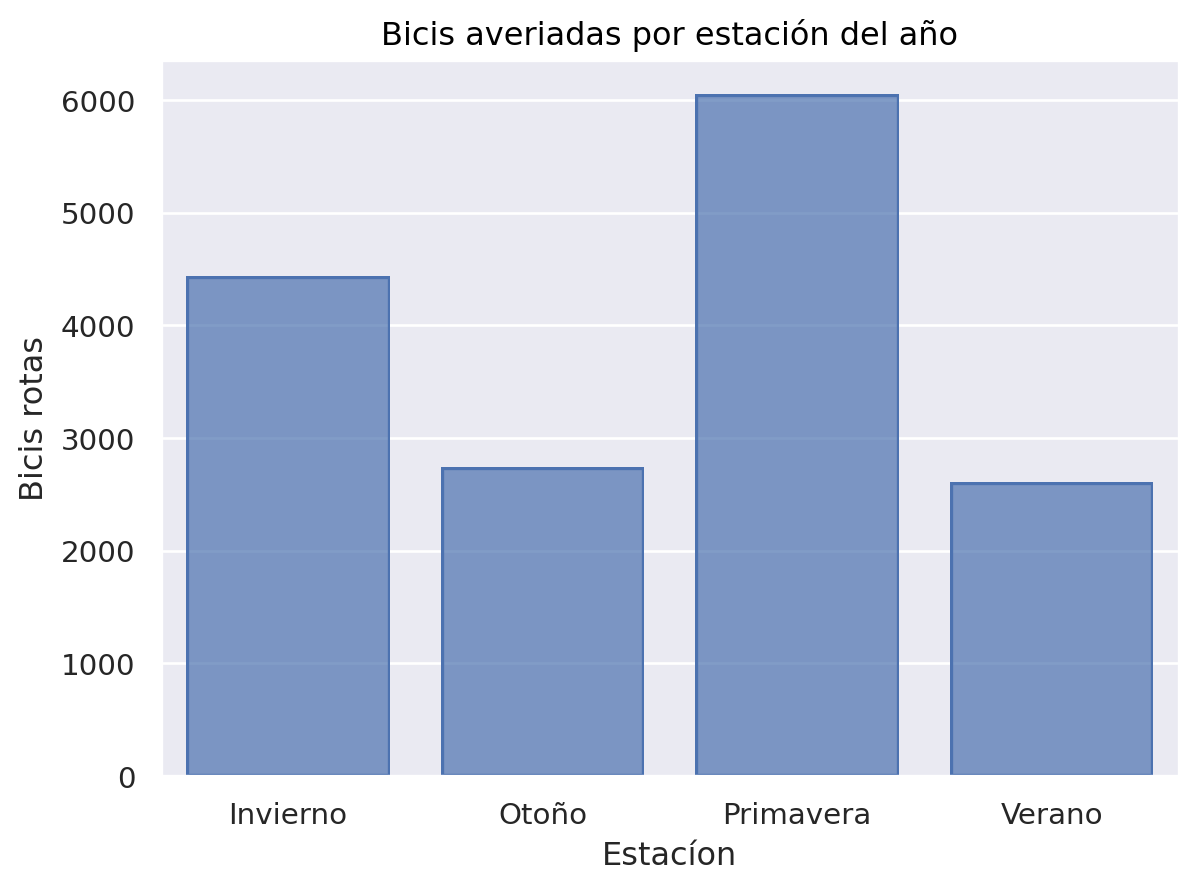

In [ ]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_rotas")
    .add(so.Bar())
    .label(title="Bicis averiadas por estación del año",x="Estacíon",y="Bicis rotas")
)

11. A continuacion veremos como varia la cantidad promedio de bicis y
    puertos disponibles por hora y dia de la semanaa?


In [ ]:
# Promedios por día de la semana y hora:

cantidades_promedios=(datos_agrupados
      .groupby(["dia_semana","hora"],as_index=False)
      [["cantidad_puertos_disponibles","cantidad_bicis_disponibles"]]
      .agg("mean").round())

# Cambiamos el nombre de las columnas:

nuevos_nombres=(
    {"cantidad_puertos_disponibles":"cantidad_puertos_disponibles(promedio)","cantidad_bicis_disponibles":"cantidad_bicis_disponibles(promedio)"}
)

cantidades_promedios = cantidades_promedios.rename(columns=nuevos_nombres)


In [ ]:
#Para que el gráfico no los ponga en orden alfabético:


cantidades_promedios

dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

cantidades_promedios["dia_semana"] = pd.Categorical(
    cantidades_promedios["dia_semana"],
    categories=dias, ordered=True
)

In [ ]:
# Fijo la escala vertical para todos los paneles, así evito posibles deformaciones como consecuencia de que cada panel se ajuste por su rango:

min_bicis = cantidades_promedios["cantidad_bicis_disponibles(promedio)"].min()
max_bicis = cantidades_promedios["cantidad_bicis_disponibles(promedio)"].max()

min_puertos = cantidades_promedios["cantidad_puertos_disponibles(promedio)"].min()
max_puertos = cantidades_promedios["cantidad_puertos_disponibles(promedio)"].max()


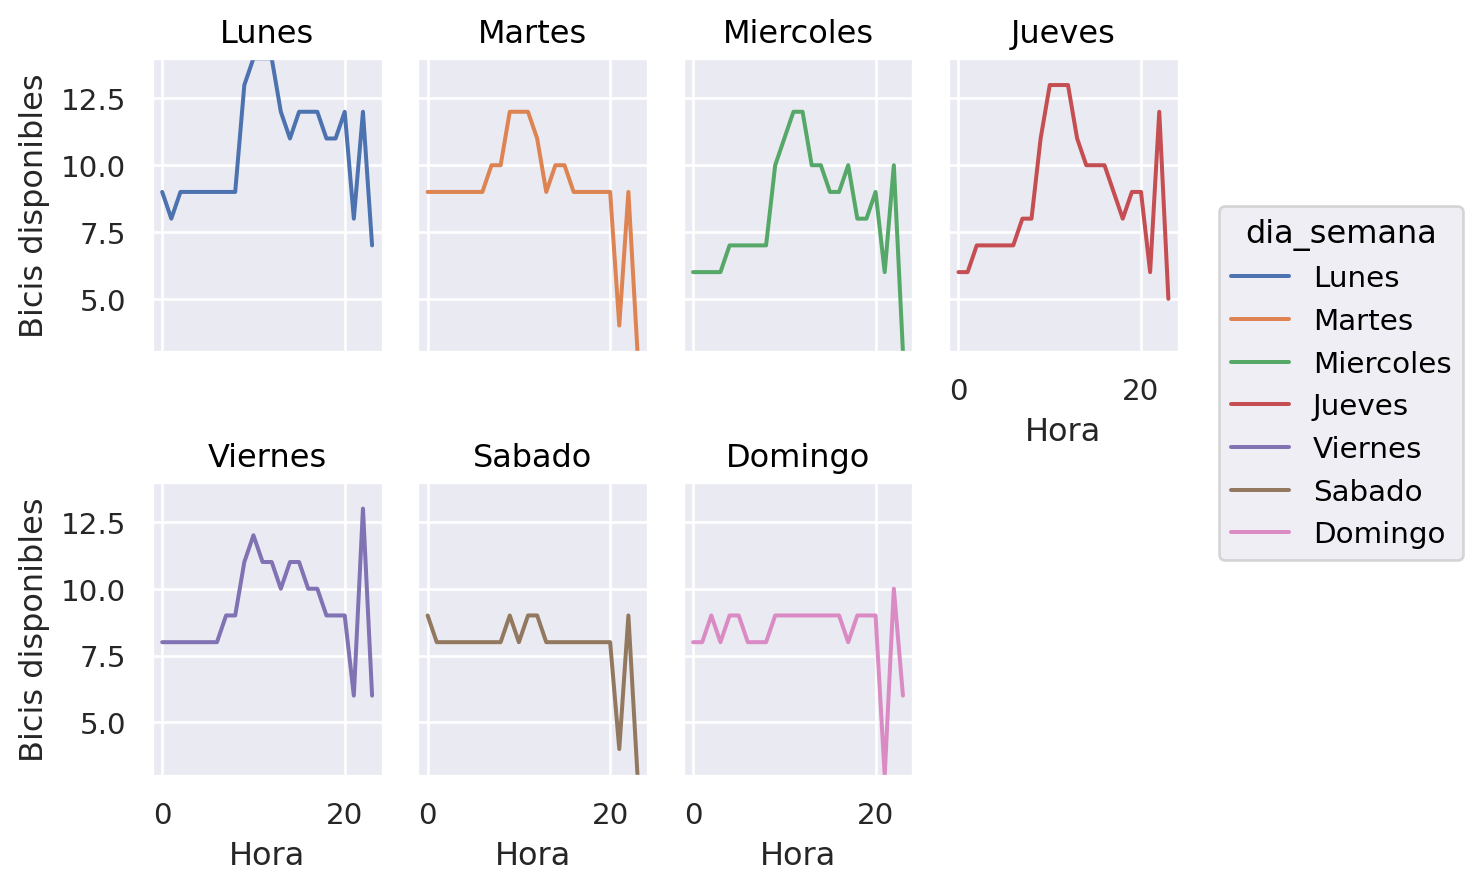

In [ ]:
# Gráficamos la cantidad promedio de bicis disponibles para cada día de la semana:

(
    so.Plot(
        cantidades_promedios,
        x = "hora",
        y = "cantidad_bicis_disponibles(promedio)",
        color="dia_semana"
    )
    .facet(col="dia_semana", wrap=4) #esto es para que me muestre 4 gráficos separados y luego cambie de linea
    .add(so.Line())
    .limit(y=(min_bicis, max_bicis))
    .label(x="Hora",y="Bicis disponibles")
)


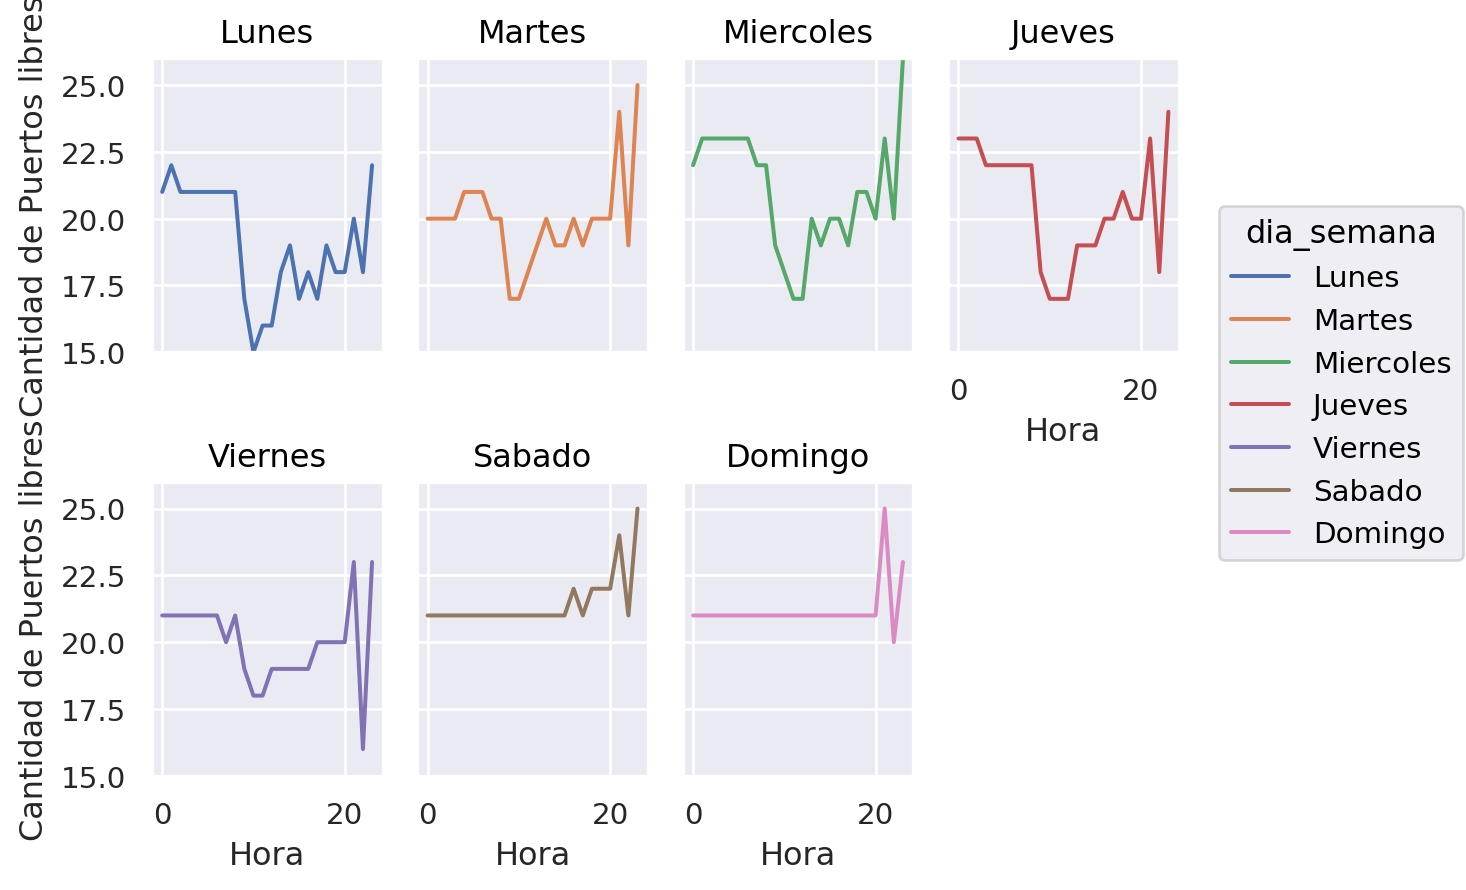

In [ ]:
# Gráficamos la cantidad promedio de puertos disponibles para cada día de la semana:

(
    so.Plot(data = cantidades_promedios,x = "hora", y = "cantidad_puertos_disponibles(promedio)",color="dia_semana")
    .facet(col="dia_semana", wrap=4)
    .add(so.Line())
    .limit(y=(min_puertos, max_puertos))
    .label(x="Hora",y="Cantidad de Puertos libres")
)

A partir de los gráficos se observa que durante los días hábiles
(De lunes a viernes) la cantidad promedio de bicicletas disponibles
disminuye marcadamente en horas de la mañana, coincidiendo con
los horarios de ingreso a las actividades académicas y laborales.

Posteriormente se observa una recuperación hacia el mediodía,
y en algunos casos una nueva disminución por la tarde.

Los puertos disponibles presentan el comportamiento inverso,
lo cual es consistente con el uso del sistema.

Durante los fines de semana el patrón es considerablemente
más estable, sin caídas pronunciadas, lo que sugiere
una menor demanda del sistema.

Esta tendencia puede explicarse por el carácter académico
de Ciudad Universitaria, donde el uso del sistema está
fuertemente asociado a los horarios de cursada.


12. En los gráficos que realizaste hay algunos valores que parezcan incorrectos o mal medidos?
¿Cómo lo podrías justificar?


En los gráficos se observan algunas variaciones abruptas, especialmente en las últimas horas del día, donde se registran
caídas o aumentos pronunciados en la cantidad de bicicletas
y puertos disponibles.

Por ejemplo, el martes la cantidad promedio de bicicletas disponibles
desciende de aproximadamente 9–10 bicicletas a solo 3–4 alrededor de
las 22–23 hs. Algo similar ocurre el domingo, donde se mantiene cerca
de 9 bicicletas durante el día y cae abruptamente a alrededor de 3 en
la última franja horaria.

En el caso de los puertos disponibles, el miércoles se observa un salto
desde aproximadamente 17 hasta más de 26 puertos libres en la última
hora del día. También el viernes presenta una caída marcada cercana a
los 16 puertos seguida de un aumento abrupto.

Las caídas abruptas observadas alrededor de las 22–23 hs pueden
explicarse por el horario de finalización de clases en Ciudad
Universitaria. En ese momento, una gran cantidad de personas
retira bicicletas para regresar a sus hogares.

Esto provoca una disminución marcada en la cantidad de bicicletas
disponibles y, simultáneamente, un aumento en la cantidad de puertos
libres, ya que las bicicletas dejan de estar ancladas.


# Análisis exploratorio

Con el objetivo de comprender la dinámica de uso del sistema de bicicletas en Ciudad Universitaria, se realiza un análisis exploratorio centrado en la evolución temporal de la disponibilidad de bicicletas.

Dado que una menor cantidad de bicicletas disponibles implica un mayor uso del sistema, se utilizará el promedio de bicicletas disponibles como indicador indirecto del nivel de demanda.

Se analizarán patrones temporales semanales y mensuales, diferencias entre días hábiles y fines de semana, medidas de dispersión y una regresión lineal simple para evaluar posibles tendencias temporales.

In [ ]:
# ¿Cuáles son las semanas con mayor uso de bicis?

# Creo una variable semana

# Sumo la cantidad total de bicis usadas por semana

# Grafico la evolución

# Identifico picos

# Lo relaciono con inicio de cuatrimestres

In [ ]:
datos_agrupados["semana"] = datos_agrupados["fecha"].dt.isocalendar().week

# Para analizar el uso semanal de las bicis necesitamos identificar a qué semana pertenece cada fecha. Como la variable fecha ya está en formato datetime (la transformación se usó en Análisis Descriptivo),
# utilizamos el método .dt.isocalendar().week para extraer el número de semana correspondiente a cada observación.
# Busqué y hace parte de lo que se había usado en la conversión de fecha a date time.
# Utilizamos las herramientas de manipulación de fechas que ofrece pandas para poder agrupar los datos temporalmente.

In [ ]:
# Para el uso semanal, con el promedio de cantidad de bicis disponibles:

uso_semanal = (
    datos_agrupados
    .groupby("semana", as_index=False)
    .agg({
        "cantidad_bicis_disponibles": "mean"
    })
)

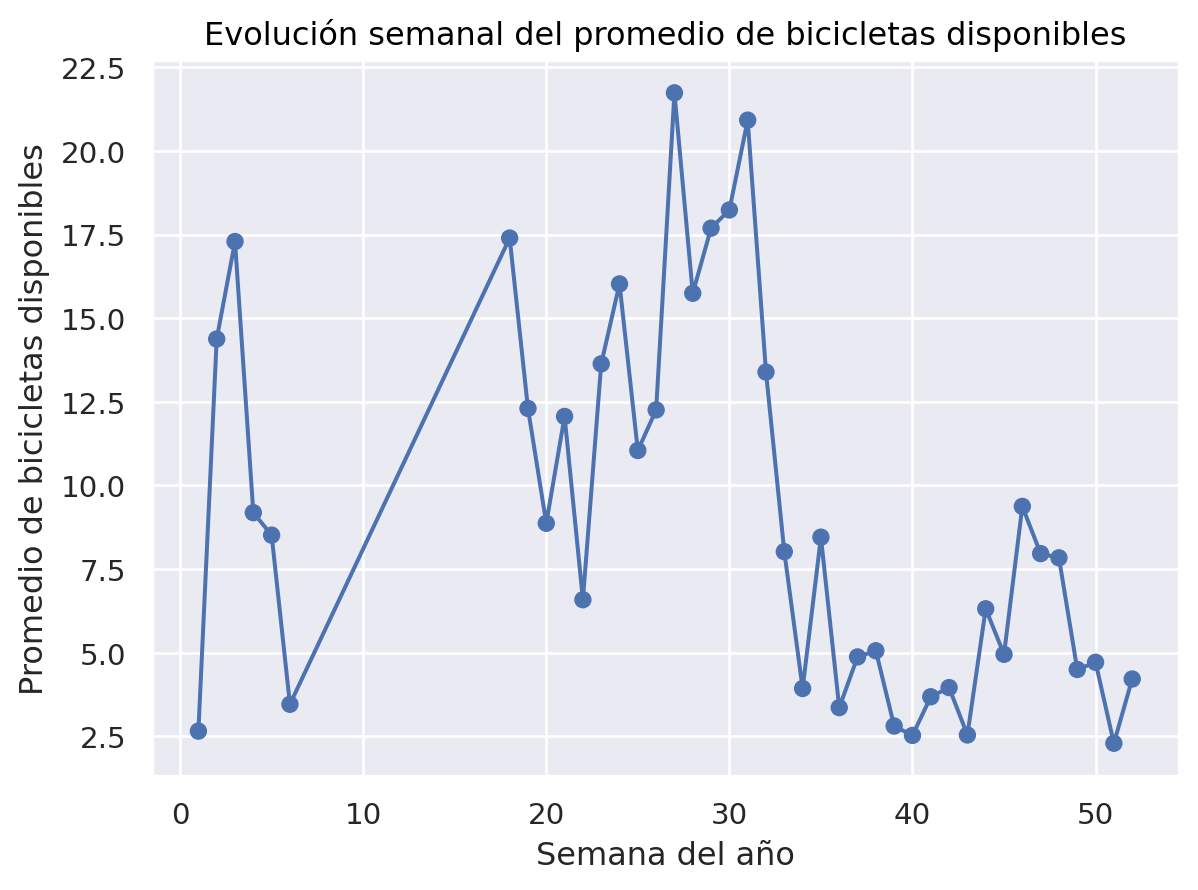

In [ ]:
# Graficamos el uso semanal:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(so.Dot())
    .label(
        x="Semana del año",
        y="Promedio de bicicletas disponibles",
        title="Evolución semanal del promedio de bicicletas disponibles"
    )
)

In [ ]:
# Para ver las semanas con menor disponibilidad de bicis (es decir, cuando hay un mayor uso de las mismas):

uso_semanal.sort_values("cantidad_bicis_disponibles").head()

,semana,cantidad_bicis_disponibles
39,51,2.290323
28,40,2.525000
31,43,2.537975
0,1,2.653595
27,39,2.806452


In [ ]:
# # Para las semanas con mayor disponibilidad de bicis (es decir, cuando hay un menor uso de las mismas):

uso_semanal.sort_values("cantidad_bicis_disponibles", ascending=False).head()

,semana,cantidad_bicis_disponibles
15,27,21.738462
19,31,20.922078
18,30,18.236842
17,29,17.692810
6,18,17.397059


Se observan fluctuaciones significativas en la disponibilidad promedio a lo largo del año, lo que sugiere que el uso del sistema no es uniforme y presenta períodos de mayor y menor demanda.

In [ ]:
# hay que responder con más herramientas y argumentos la pregunta de:

# ¿Corresponden con los inicios de los cuatrimestres de la FCEyN / FADU / CBC?


In [ ]:
# Puedo dentificar explícitamente las semanas de inicio de cuatrimestre,
# compararlas con el resto del año,
# visualizarlo en un gráfico donde se vea claramente la diferencia
# y agregar una comparación numérica simple (como loss promedios).

# Lo hago mas adelante

Analizamos los dias hábiles vs findes:

In [ ]:
# Creo variables indicadoras que me servirán:

datos_agrupados["dia_semana"] = datos_agrupados["fecha"].dt.dayofweek
datos_agrupados["fin_de_semana"] = datos_agrupados["dia_semana"] >= 5

In [ ]:
# Acá acabo de entrar en pánico. En los primeros puntos se usan comandos para pasar la fecha de object a datetime. Eso lo había buscado online. Hay comandos en ese mismo grupo dt como dayofweek o dayofmonth.
# Pero entré en pánico porque no sé si sea problematico usar eso que no vimos en clase, estrictamente. Es una boludez menor, capaz, pero no sé. Será que está prohibido?
# Tocaría re hacer todo D:
# Finjo demencia y sigo. Mañana lo hablamos:


In [ ]:
# Estadísticos para comparar los días:

comparacion_dias = (
    datos_agrupados
    .groupby("fin_de_semana")
    ["cantidad_bicis_disponibles"]
    .agg(["mean", "std"])
)

comparacion_dias

,mean,std
fin_de_semana,,
False,9.317246,7.266476
True,8.496279,7.631952


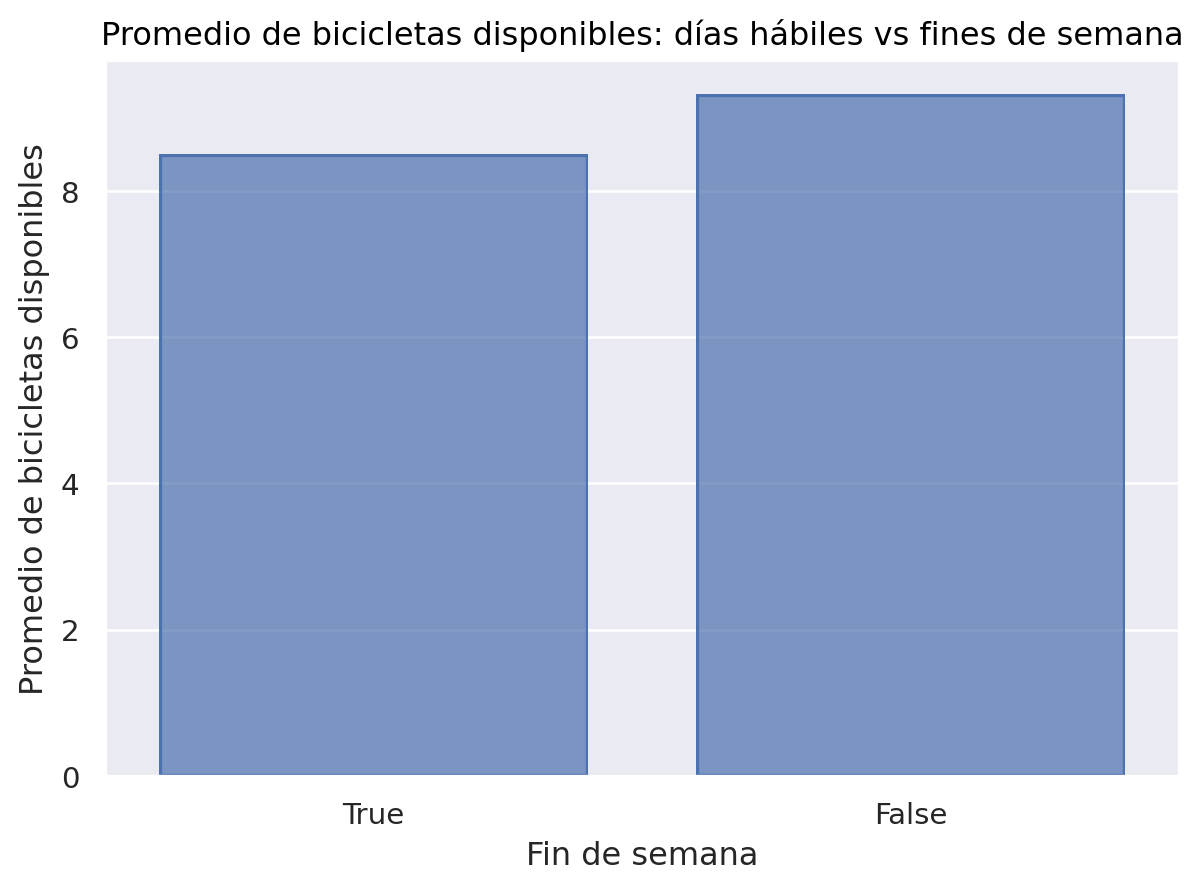

In [ ]:
(
    so.Plot(
        datos_agrupados,
        x="fin_de_semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Bar(), so.Agg("mean"))
    .label(
        x="Fin de semana",
        y="Promedio de bicicletas disponibles",
        title="Promedio de bicicletas disponibles: días hábiles vs fines de semana"
    )
)

Uso mensual:

In [ ]:
uso_mensual = (
    datos_agrupados
    .groupby("mes")
    ["cantidad_bicis_disponibles"]
    .agg(["mean", "std"])
)

uso_mensual

,mean,std
mes,,
1,11.212575,6.982073
2,4.036036,2.335216
4,16.130435,6.035483
5,11.237216,7.120921
6,13.058104,6.250978
7,18.249622,5.334538
8,9.941945,7.356938
9,4.026588,4.197337
10,3.830725,4.955479


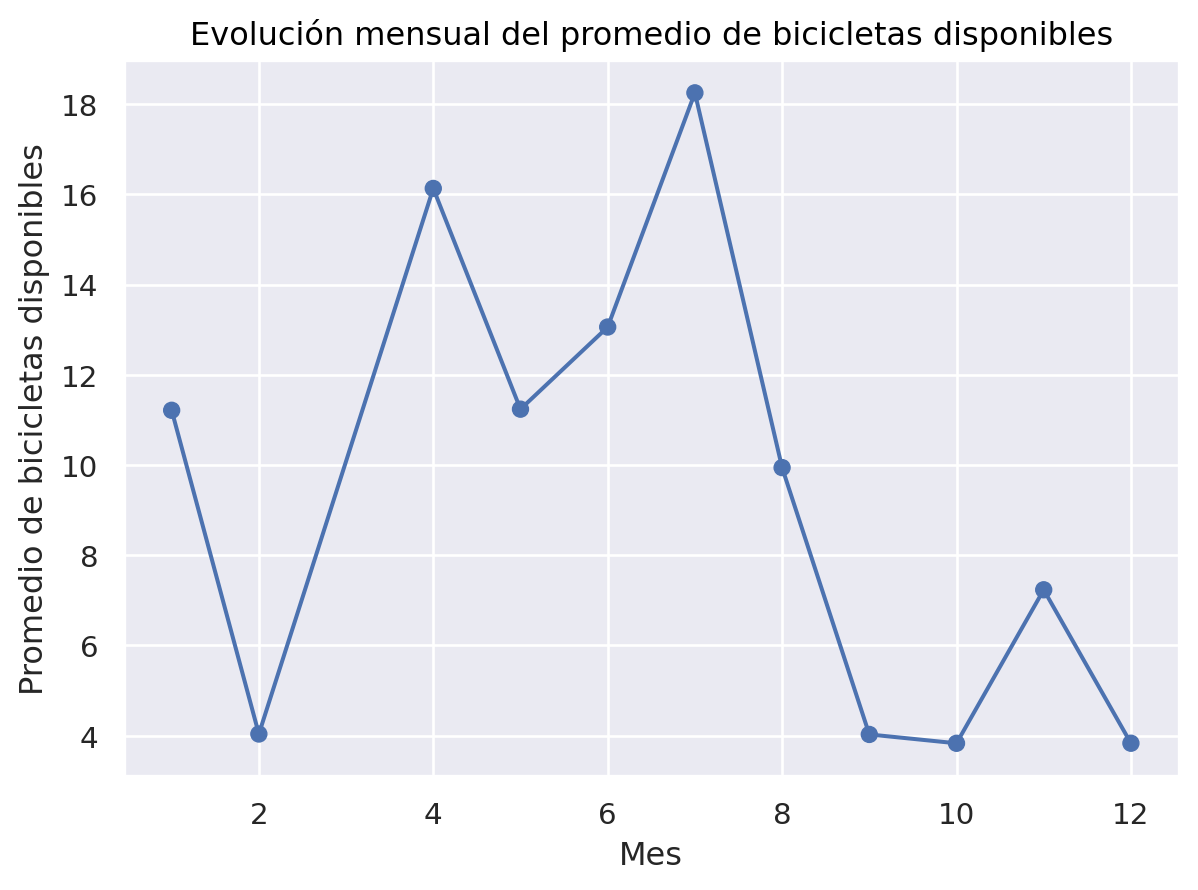

In [ ]:
(
    so.Plot(
        datos_agrupados,
        x="mes",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line(), so.Agg("mean"))
    .add(so.Dot(), so.Agg("mean"))
    .label(
        x="Mes",
        y="Promedio de bicicletas disponibles",
        title="Evolución mensual del promedio de bicicletas disponibles"
    )
)

Inicio de cuatris:

In [ ]:
# Creamos una variable boolena (True/False) que indique si es una semana de inicio de cuatrimestre:

# Usamos como criterio: - Inicio 1er cuatrimestre: semanas 9 a 12 - Inicio 2do cuatrimestre: semanas 31 a 34

uso_semanal["inicio_cuatrimestre"] = uso_semanal["semana"].isin([9,10,11,12,31,32,33,34])

In [ ]:
uso_semanal.head()

,semana,cantidad_bicis_disponibles,inicio_cuatrimestre
0,1,2.653595,False
1,2,14.377483,False
2,3,17.293333,False
3,4,9.185430,False
4,5,8.513514,False


In [ ]:
uso_semanal

,semana,cantidad_bicis_disponibles,inicio_cuatrimestre
0,1,2.653595,False
1,2,14.377483,False
2,3,17.293333,False
3,4,9.185430,False
4,5,8.513514,False
5,6,3.456522,False
6,18,17.397059,False
7,19,12.301887,False
8,20,8.867925,False
9,21,12.062893,False


In [ ]:
# Comparo promedios:

uso_semanal.groupby("inicio_cuatrimestre")["cantidad_bicis_disponibles"].mean()

,cantidad_bicis_disponibles
inicio_cuatrimestre,
False,8.877160
True,11.565019


/usr/local/lib/python3.12/dist-packages/seaborn/_core/plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<IntegerArray>
[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,   31,   32,   33,   34, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>]
Length: 41, dtype: UInt32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])


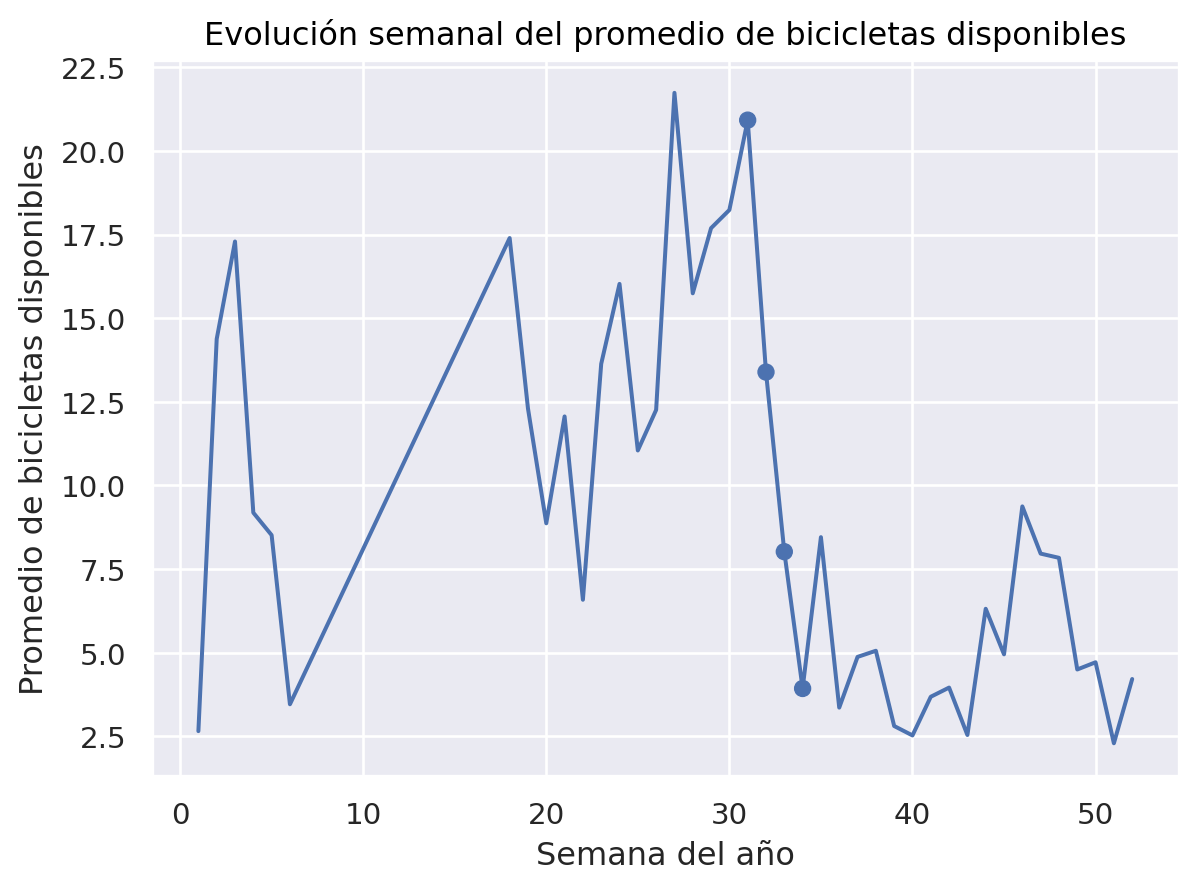

In [ ]:
# Graficamos el uso semanal, con los inicios de cuatrimestre como Puntos para distinguirlo:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(
        so.Dot(),
        data=uso_semanal[uso_semanal["inicio_cuatrimestre"] == True]
    )
    .label(
        x="Semana del año",
        y="Promedio de bicicletas disponibles",
        title="Evolución semanal del promedio de bicicletas disponibles"
    )
)

In [ ]:
# No me está marcando los puntos de inicio del primer cuatri!!!

In [ ]:
uso_semanal[uso_semanal["inicio_cuatrimestre"] == True]

,semana,cantidad_bicis_disponibles,inicio_cuatrimestre
19,31,20.922078,True
20,32,13.389610,True
21,33,8.019355,True
22,34,3.929032,True


In [ ]:
uso_semanal["semana"].min(), uso_semanal["semana"].max()

(np.uint32(1), np.uint32(52))

In [ ]:
datos_agrupados[datos_agrupados["mes"] == 3]["semana"].unique()

<IntegerArray>
[]
Length: 0, dtype: UInt32

Se intentó identificar tanto el inicio del primer como del segundo cuatrimestre. Sin embargo, el dataset no contiene registros correspondientes al mes de marzo, por lo que únicamente se pudo analizar el inicio del segundo cuatrimestre (agosto).

In [ ]:
datos_agrupados["mes"].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int32)

Entonces...desde el principio, análisis de inicio de cuatri: Dado que el dataset no incluye marzo, se analiza el inicio del segundo cuatrimestre.



In [ ]:
semanas_inicio = [31, 32, 33, 34]

uso_semanal["inicio_cuatrimestre"] = uso_semanal["semana"].isin(semanas_inicio)

In [ ]:
# Promedio y desviación para comparar:

comparacion_cuatrimestre = (
    uso_semanal
    .groupby("inicio_cuatrimestre")
    ["cantidad_bicis_disponibles"]
    .agg(["mean", "std"])
)

comparacion_cuatrimestre

,mean,std
inicio_cuatrimestre,,
False,8.877160,5.509324
True,11.565019,7.343108


/usr/local/lib/python3.12/dist-packages/seaborn/_core/plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<IntegerArray>
[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,   31,   32,   33,   34, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>]
Length: 41, dtype: UInt32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])


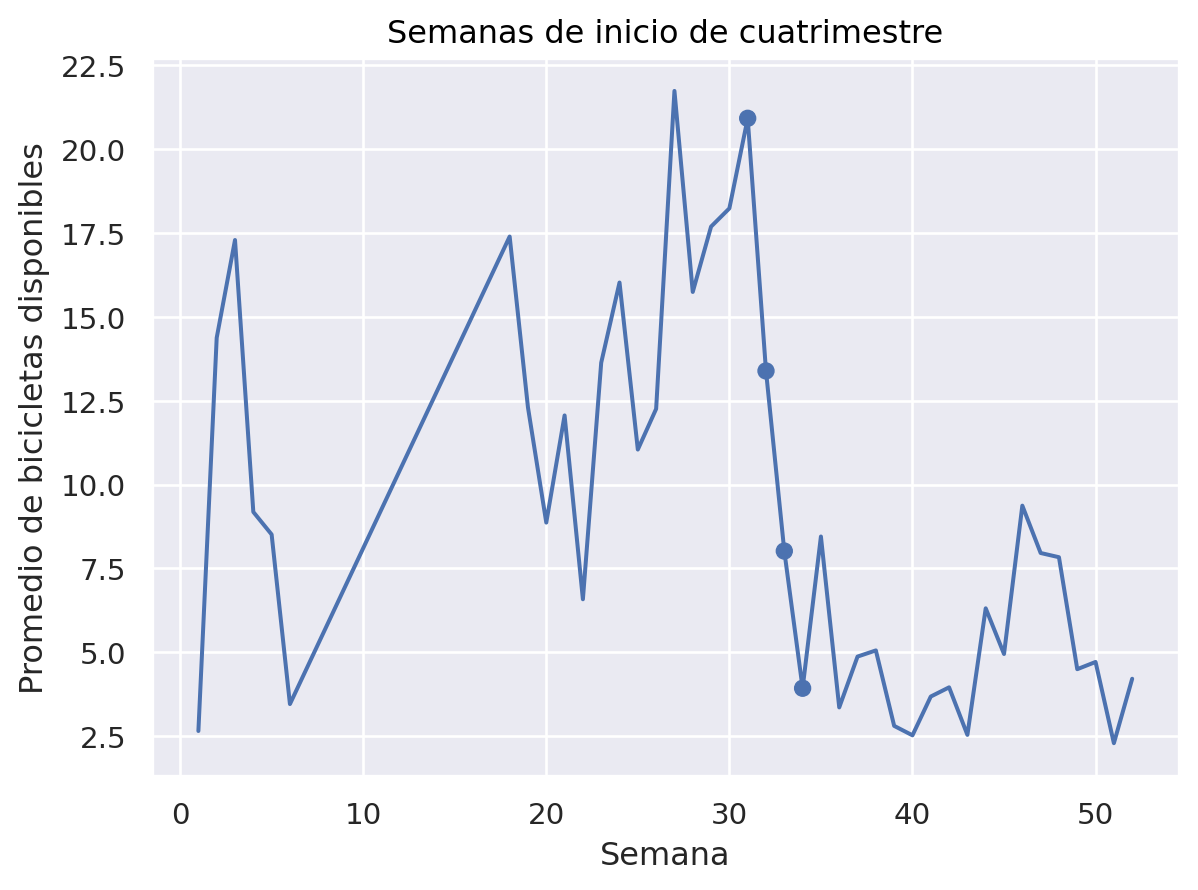

In [ ]:
# Grafico, puntos en las semanas de inicio:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(
        so.Dot(),
        data=uso_semanal[uso_semanal["inicio_cuatrimestre"] == True]
    )
    .label(
        x="Semana",
        y="Promedio de bicicletas disponibles",
        title="Semanas de inicio de cuatrimestre"
    )
)

# Regresión lineal

En esta sección, queremos analizar el uso de bicis en otras estaciones de la Ciudad. Para eso vamos
a utilizar el dataset viajes-por-dia.csv con la cantidad de viajes por hora realizados desde cada
estación y cantidad de viajes por hora realizados hacia cada estación.


In [ ]:
viajes = pd.read_csv("viajes_diarios.csv")

viajes.head()

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Verifico que esté presente la variable a modelar, origen_5:

viajes.columns


Index(['fecha', 'origen_2', 'origen_3', 'origen_4', 'origen_5', 'origen_6',
       'origen_7', 'origen_8', 'origen_9', 'origen_12',
       ...
       'destino_567', 'destino_568', 'destino_569', 'destino_570',
       'destino_572', 'destino_573', 'destino_574', 'destino_575',
       'destino_576', 'destino_577'],
      dtype='object', length=794)

In [ ]:
# Reviso si hay valores faltantes:

viajes.isna().sum()

,0
fecha,0
origen_2,0
origen_3,0
origen_4,0
origen_5,0
...,...
destino_573,0
destino_574,0
destino_575,0
destino_576,0


In [ ]:
# Para saber si tengo 0 datos faltantes en todos los casos, hago la suma. Si obtengo 0, no hay datos faltantes:

viajes.isna().sum().sum()

np.int64(0)

In [ ]:
# Reviso los tipos de datos en viajes. Tengo que todos los origen_X son de tipo, pero fecha es de tipo object:

viajes.dtypes

,0
fecha,object
origen_2,int64
origen_3,int64
origen_4,int64
origen_5,int64
...,...
destino_573,int64
destino_574,int64
destino_575,int64
destino_576,int64


In [ ]:
# Para la regresión lineal solo me sirven las variables númericas. Por lo tanto debo excluir fecha. También excluyo a la variable a trabajar, origen_5. Me quedo con las posibles variables para explicar a origin_5:

variables_explicativas = viajes.drop(columns=["origen_5", "fecha"])

In [ ]:
# Queremos modelar la variable origin_5 en función de otras variables del Data Frame. Doy un nombre más declarativo a la variable a trabajar:

variable_objetivo = viajes["origen_5"]




Queremos utilizar un modelo lineal:
$$ origen_5 = \beta_0 + \beta_1 destino_A + \beta_2 destino_B + ...$$




15. Se quiere ajustar la cantidad de viajes con origen en la estación 005 - Plaza Italia en función de
viajes originados en otras estaciones o con destino en distintas estaciones. Es decir, queremos
hacer un modelo para ajustar la variable origen_5 en función de otras variables del DataFrame.


In [ ]:
# Saco los de fecha por no ser un dato númerico:

viajes_numericos = viajes.drop(columns=["fecha"])

In [ ]:
# Hice trampa, busqué como sacar la matriz de correlación para ver cuales variables se correlacionaban mejor, así no tenía que hacer a mano muchas combinaciones y ver como se comportaban. A partir de eso, dejo tres propuestas. Cuando puedan las discutimos:

# Modelo 1: Las de las variables que mostraron mayor correlación.
# Criterio: usar las 5 variables con mayor correlación con origen_5. Se seleccionaron las variables con mayor correlación lineal con la variable objetivo.
# Utilizo como variables a: destino_5, destino_29, origen_29, origen_9, destino_14.

# Modelo 2: Solo estaciones distintas para origen y destino, excluyendo a destino_5.
# Criterio: Sacar a  destino_5 para evitar una dependencia muy marcada, dado que está directamente relacionada con lo que sucede en origen_5. Se excluyó destino_5 para evaluar la capacidad predictiva basada en estaciones relacionadas.
# Utilizo como variables a: destino_29, origen_29 ,origen_9, destino_14, origen_14.

# Modelo 3: Mezcla de origenes y destinos.
# Criterio: usar las 5 variables con mayor correlación con origen_5. Se seleccionaron estaciones con alta correlación, balanceando orígenes y destinos.
# Utilizo como variables a: origen_29, origen_9, origen_14, destino_9, destino_277.

In [ ]:
# Modelo 1

In [ ]:
# Defino variables:

# Variable objetivo
variable_objetivo = viajes["origen_5"]

# Variables explicativas del Modelo 1
variables_modelo_1 = viajes[[
    "destino_5",
    "destino_29",
    "origen_29",
    "origen_9",
    "destino_14"
]]


In [ ]:
# Inicializamos el modelo de regresión:

modelo_1 = linear_model.LinearRegression()


#Ajusto el modelo:

modelo_1.fit(variables_modelo_1, variable_objetivo)

LinearRegression()

In [ ]:
# Mostramos coeficientes

print("Coeficientes:", modelo_1.coef_)
print("Intercepto:", modelo_1.intercept_)

Coeficientes: [ 0.94688047  0.08554209 -0.03869064  0.02296074  0.0092587 ]
Intercepto: -0.9009818925875521


In [ ]:
# Predicciones para todos los datos

y_pred_1 = modelo_1.predict(variables_modelo_1)

# Mostramos las primeras
display(y_pred_1[:10])


array([ 52.96502857, 120.1942539 , 121.73005814,  94.24551813,
        85.46761575,  72.17595917,  40.69958228, 131.33242832,
       107.62852889, 100.08202836])

In [ ]:
# R2

modelo_1.score(variables_modelo_1, variable_objetivo)

# También manualmente
r2_score(variable_objetivo, y_pred_1)

# Error cuadrático medio
mean_squared_error(variable_objetivo, y_pred_1)

# Raíz del ECM

root_mean_squared_error(variable_objetivo, y_pred_1)




8.752293551815217

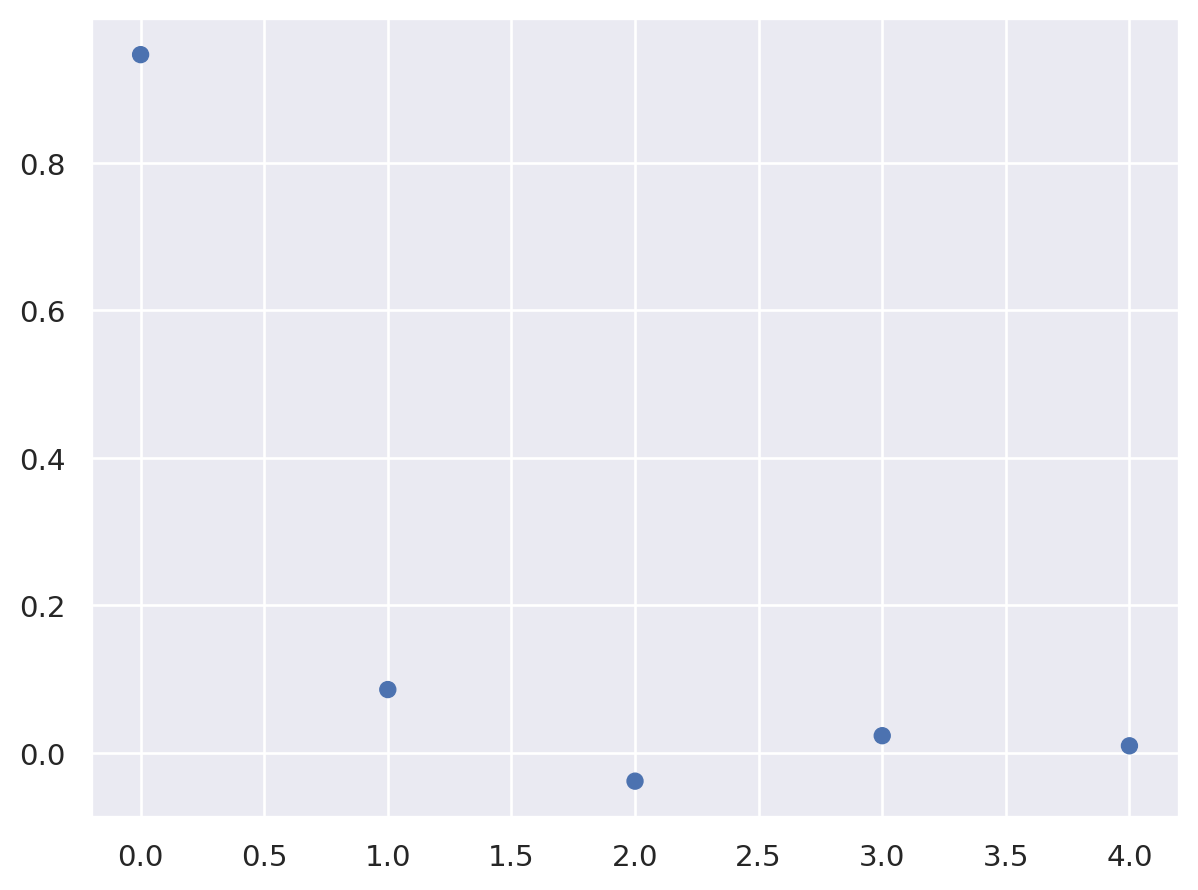

In [ ]:
so.Plot(x = np.arange(len(modelo_1.coef_)), y = modelo_1.coef_).add(so.Dot())

In [ ]:
# Modelo 2:

In [ ]:
# Defino variables:

# Variable objetivo:

variable_objetivo = viajes["origen_5"]


# Variables explicativas del Modelo 2:
variables_modelo_2 = viajes[[
    "destino_29",
    "origen_29",
    "origen_9",
    "destino_14",
    "origen_14"
]]

In [ ]:
# Inicializamos el modelo de regresión:

modelo_2 = linear_model.LinearRegression()


#Ajusto el modelo:

modelo_2.fit(variables_modelo_2, variable_objetivo)

LinearRegression()

In [ ]:
# Mostramos coeficientes

print("Coeficientes:", modelo_2.coef_)
print("Intercepto:", modelo_2.intercept_)

Coeficientes: [0.39614328 0.11997092 0.31523053 0.17551252 0.05256994]
Intercepto: 12.872483303531922


In [ ]:
# Predicciones para todos los datos

y_pred_2 = modelo_2.predict(variables_modelo_2)

# Mostramos las primeras
display(y_pred_2[:10])


array([ 61.72405178,  94.85032833,  97.28974824, 101.16848067,
        98.5095042 ,  55.37302471,  43.8767241 , 109.16543085,
        99.56661171,  82.75762765])

In [ ]:
# R2

modelo_2.score(variables_modelo_2, variable_objetivo)

# También manualmente
r2_score(variable_objetivo, y_pred_2)

# Error cuadrático medio
mean_squared_error(variable_objetivo, y_pred_2)

# Raíz del ECM

root_mean_squared_error(variable_objetivo, y_pred_2)


22.64223995427854

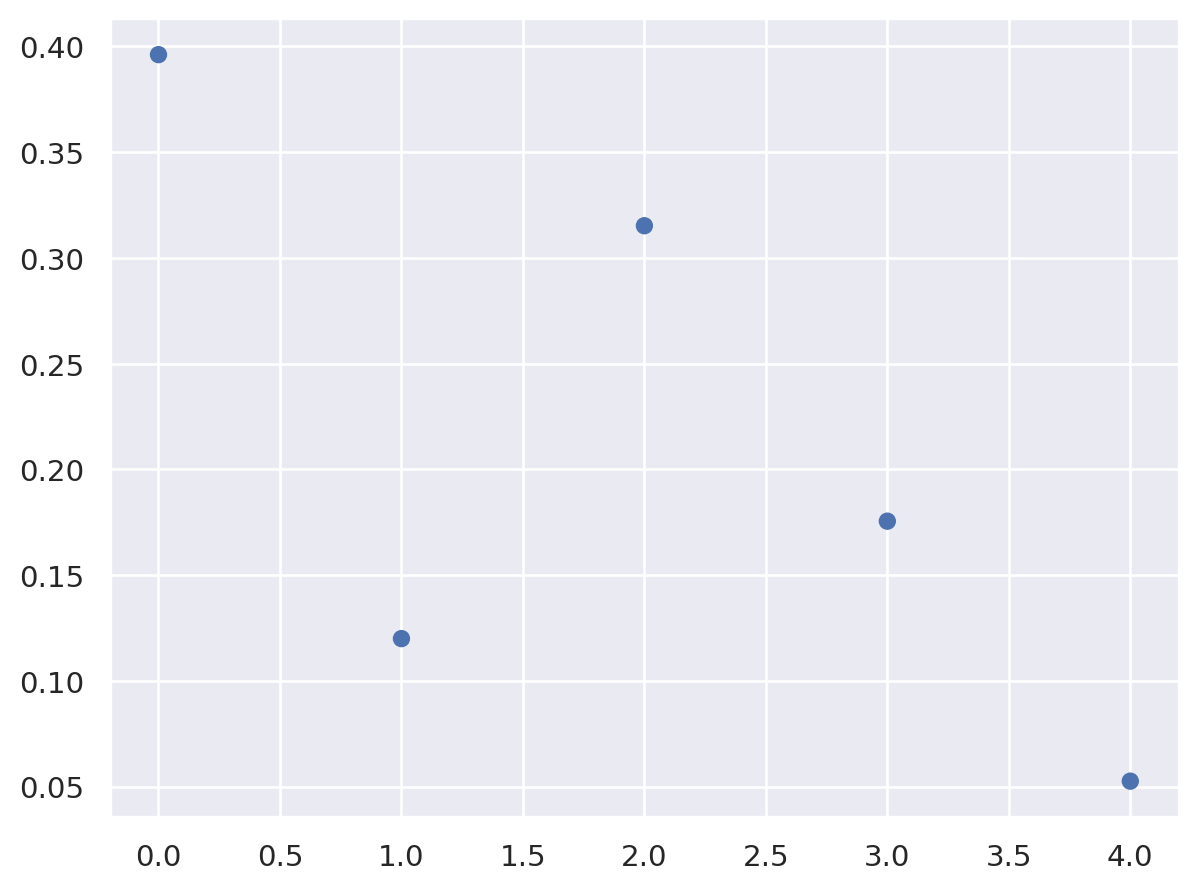

In [ ]:
so.Plot(x = np.arange(len(modelo_2.coef_)), y = modelo_2.coef_).add(so.Dot())

In [ ]:
# Modelo 3

In [ ]:
# Defino variables:

variables_modelo_3 = viajes[[
    "origen_29",
    "origen_9",
    "origen_14",
    "destino_9",
    "destino_277"
]]

In [ ]:
# Inicializamos el modelo de regresión:

modelo_3 = linear_model.LinearRegression()


#Ajusto el modelo:

modelo_3.fit(variables_modelo_3, variable_objetivo)

LinearRegression()

In [ ]:
# Mostramos coeficientes

print("Coeficientes:", modelo_3.coef_)
print("Intercepto:", modelo_3.intercept_)

Coeficientes: [0.3457955  0.25448456 0.14259871 0.01749266 0.37862318]
Intercepto: 11.694525400599943


In [ ]:
# Predicciones para todos los datos

y_pred_3 = modelo_3.predict(variables_modelo_3)

# Mostramos las primeras
display(y_pred_3[:10])

array([ 67.78510985,  95.86196235, 115.51318893, 108.24351779,
       117.99036933,  59.02314753,  39.36583627, 121.02223902,
       118.41830135,  90.63936092])

In [ ]:
# R2

modelo_3.score(variables_modelo_3, variable_objetivo)

# También manualmente
r2_score(variable_objetivo, y_pred_3)

# Error cuadrático medio
mean_squared_error(variable_objetivo, y_pred_3)

# Raíz del ECM

root_mean_squared_error(variable_objetivo, y_pred_3)

22.132054590290064

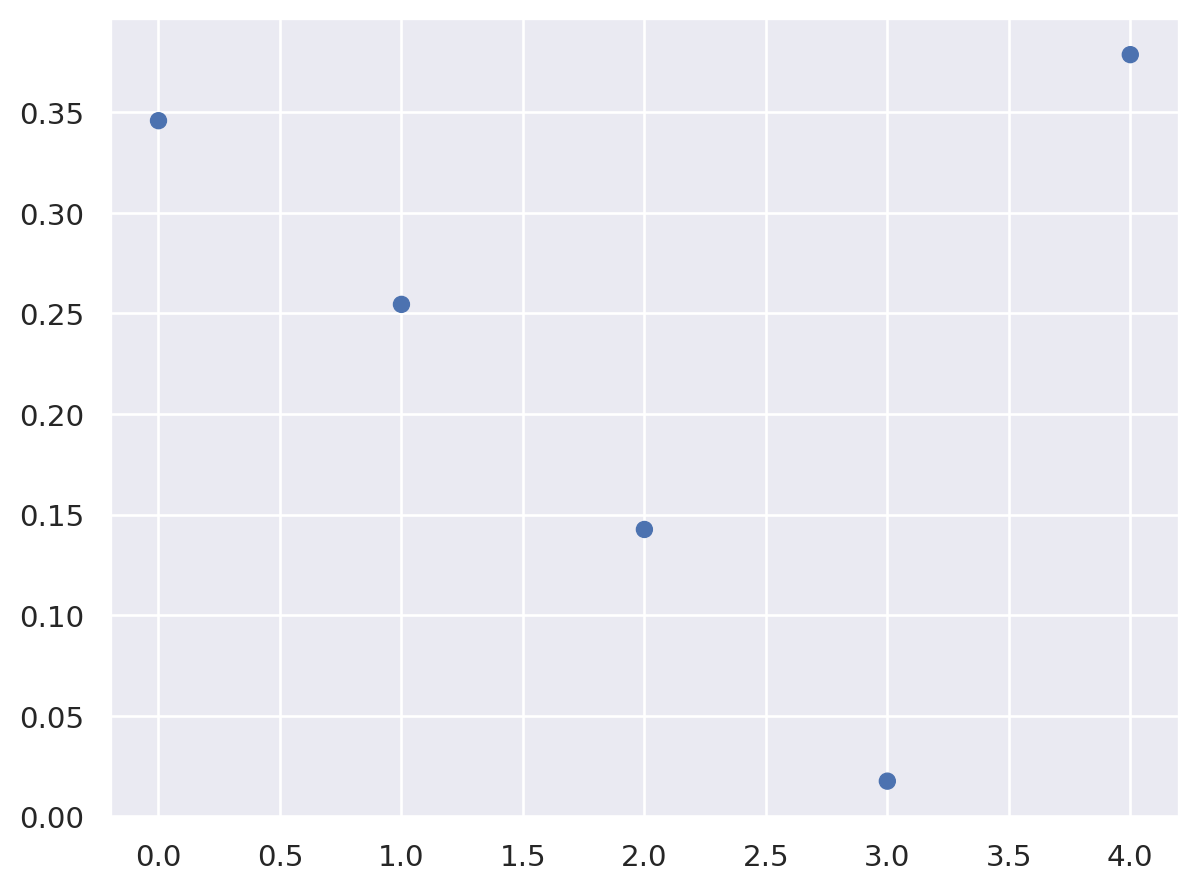

In [ ]:
so.Plot(x = np.arange(len(modelo_3.coef_)), y = modelo_3.coef_).add(so.Dot())

In [ ]:
# Hasta ahora, de los tres modelos, tengo:

print("MODELO 1")
print("R2:", r2_score(variable_objetivo, y_pred_1))
print("MSE:", mean_squared_error(variable_objetivo, y_pred_1))
print("RMSE:", root_mean_squared_error(variable_objetivo, y_pred_1))

print("MODELO 2")
print("R2:", r2_score(variable_objetivo, y_pred_2))
print("MSE:", mean_squared_error(variable_objetivo, y_pred_2))
print("RMSE:", root_mean_squared_error(variable_objetivo, y_pred_2))

print("MODELO 3")
print("R2:", r2_score(variable_objetivo, y_pred_3))
print("MSE:", mean_squared_error(variable_objetivo, y_pred_3))
print("RMSE:", root_mean_squared_error(variable_objetivo, y_pred_3))


MODELO 1
R2: 0.9525750138544266
MSE: 76.60264241714624
RMSE: 8.752293551815217
MODELO 2
R2: 0.6826034228745843
MSE: 512.6710301471276
RMSE: 22.64223995427854
MODELO 3
R2: 0.6967457282009184
MSE: 489.82784038757944
RMSE: 22.132054590290064


17. Propongan un esquema de validaci´on de los modelos y utilizarlo para seleccionar el mejor de
los tres modelos propuestos.
Importante: Pueden utilizar cualquier criterios para la elecci´on de las variables de cada
modelo, no se pide buscar las 5 mejores variables entre todas las disponibles. Lo que s´ı tienen
que hacer es explicar entre los 3 modelos que proponen c´omo seleccionan el mejor de ellos

> Add blockquote



In [ ]:
# Ni idea por ahora. De momento dejo opciones de texto contando que se tiene con las métricas y analizando:


Para comparar los tres modelos propuestos se utilizó un esquema de validación basado en métricas de desempeño predictivo calculadas sobre los mismos datos utilizados para el ajuste. En particular, se evaluaron los siguientes indicadores:

- Coeficiente de determinación (R²)

- Error Cuadrático Medio (MSE)

- Raíz del Error Cuadrático Medio (RMSE)

El coeficiente R² permite medir qué proporción de la variabilidad de la variable objetivo (origen_5) es explicada por el modelo. Por su parte, el MSE y el RMSE cuantifican el error promedio de predicción, siendo deseable que estos valores sean lo más bajos posibles.

Se ajustaron los tres modelos utilizando LinearRegression de scikit-learn y se calcularon las métricas correspondientes a cada uno. La comparación mostró que:

El Modelo 1 presentó el mayor R² (0.95) y los menores valores de MSE y RMSE.

Los Modelos 2 y 3 presentaron valores de R² significativamente menores (≈ 0.68–0.70) y errores considerablemente más altos.

En consecuencia, bajo el criterio de maximizar la capacidad explicativa y minimizar el error de predicción, el Modelo 1 fue seleccionado como el mejor entre los tres propuestos.

No obstante, se destaca que el Modelo 1 incluye la variable destino_5, que presenta una correlación muy alta con origen_5, lo que puede explicar en gran medida su desempeño superior. Por lo tanto, aunque es el modelo con mejor ajuste estadístico, parte de su poder predictivo se debe a la fuerte relación estructural entre los flujos de entrada y salida de la misma estación.



Se propusieron tres modelos de regresión lineal para ajustar la cantidad de viajes con origen en la estación 005 – Plaza Italia (origen_5), utilizando hasta cinco variables explicativas en cada caso. Los modelos fueron comparados mediante el coeficiente de determinación (R²), el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE).

El Modelo 1 presentó un desempeño significativamente superior (R² = 0.95), explicando aproximadamente el 95% de la variabilidad de la variable objetivo y mostrando un error considerablemente menor que los otros modelos. Este modelo incluye como variable explicativa destino_5, la cual presenta una correlación muy alta con origen_5. Por lo tanto, si el criterio principal es maximizar la capacidad predictiva del modelo, el Modelo 1 sería el elegido, ya que ofrece el mejor ajuste y el menor error. Sin embargo, este resultado puede explicarse en parte por la fuerte dependencia estructural entre los flujos de entrada y salida en Plaza Italia, lo que implica que el modelo está capturando un fenómeno casi simétrico más que relaciones entre estaciones distintas.

El Modelo 2 excluye la variable destino_5 y utiliza únicamente variables asociadas a otras estaciones. Este modelo presenta un R² de aproximadamente 0.68, con errores considerablemente mayores. Si el objetivo fuera analizar la capacidad predictiva basada exclusivamente en la interacción entre estaciones distintas, evitando la relación casi directa entre origen y destino en la misma estación, podría elegirse este modelo. No obstante, su menor desempeño indica que las estaciones seleccionadas explican una proporción más limitada de la variabilidad en los viajes originados en Plaza Italia.

El Modelo 3 también excluye destino_5, pero propone una combinación diferente de variables explicativas, equilibrando orígenes y destinos de otras estaciones. Este modelo mejora ligeramente el desempeño respecto al Modelo 2 (R² ≈ 0.70), manteniendo un error similar aunque algo menor. Si el criterio fuera priorizar una interpretación más estructural del sistema de movilidad —es decir, analizar cómo otras estaciones influyen en Plaza Italia sin recurrir a su flujo de retorno directo— el Modelo 3 resultaría una alternativa razonable, ya que presenta el mejor desempeño entre los modelos que no utilizan la variable altamente correlacionada.

En conclusión, si el objetivo principal es la máxima precisión predictiva, el Modelo 1 es claramente superior. Sin embargo, si se busca un modelo más interpretativo que capture relaciones entre distintas estaciones y no dependa de la fuerte correlación interna de Plaza Italia, el Modelo 3 es más adecuado.

18. Para el modelo elegido, indiquen la f´ormula final de modelo.



El modelo seleccionado fue el Modelo 1, ya que presentó el mayor coeficiente de determinación (R² = 0.95) y los menores valores de error, mostrando el mejor desempeño predictivo entre los tres modelos propuestos.

La ecuación estimada del modelo de regresión lineal múltiple es:

$$
\hat{origen\_5}
=
\beta_0
+
\beta_1 destino\_5
+
\beta_2 destino\_29
+
\beta_3 origen\_29
+
\beta_4 origen\_9
+
\beta_5 destino\_14
$$

donde:

- El intercepto estimado es \(-0.90098\).
- Cada coeficiente indica el cambio esperado en la cantidad de viajes con origen en Plaza Italia ante un aumento de una unidad en la variable correspondiente, manteniendo las demás constantes.

Se observa que la variable `destino_5` tiene el coeficiente más alto (0.94688), lo cual es consistente con la fuerte correlación observada entre los flujos de entrada y salida en la misma estación.
